In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


0 {
0 �
0 
0 �
0 as
0  l
0  that
0 ir
0 il
0  as
0 oc
0  this
0  O
0  but
0 ime
0 ia
0  been
0 lic
0 form
0  acc
0  now
0  10
0 self
1 #
1 O
1 S
1 ^
1 |
1 �
1 �
1 �
1 �
1 �
1 �
1  M
1 ant
1  can
1  wor
1 og
1  �
1  Y
1  res
1 ence
1  dis
1  year
1 ition
1 tern
1  then
1 oss
1 ific
1  Tr
1  way
1 ting
1  show
1  stud
1  Com
2 4
2 >
2 C
2 D
2 ]
2 e
2 q
2 �
2 �
2 �
2 �
2 �
2 �
2 
2 �
2 �
2 �
2 �
2 id
2  he
2  H
2  ha
2  L
2  v
2 el
2 ive
2 pt
2 ast
2  k
2  up
2  -
2 cl
2  no
2 ang
2  into
2  tw
2 ark
2 amp
2 hed
2 ater
2 sel
2  should
2 tt
2  game
3 5
3 �
3 �
3 �
3 �
3 �
3 �
3 �
3 �
3 
3 
3 
3 
3  
3 �
3 �
3 er
3  s
3 ro
3  be
3 ac
3 ce
3  su
3  sh
3 ie
3  their
3 able
3 ign
3  He
3 ish
3  [
3  bl
3 erv
3  could
3  two
3  add
3  pol
3  again
3  these
3 day
3 're
3  right
3 oth
3  those
3  ke
3  set
3  say
3  eff
3 ren
3  ac
3  used
3  inter
4 3
4 K
4 a
4 f
4 j
4 �
4 �
4 �
4 
4 
4 is
4  for
4 ill
4  de
4 pe
4  al
4 ud
4 't
4 ff
4 one
4 per
4  which
4 ays
4 ens
4  ro
4  need
4  want

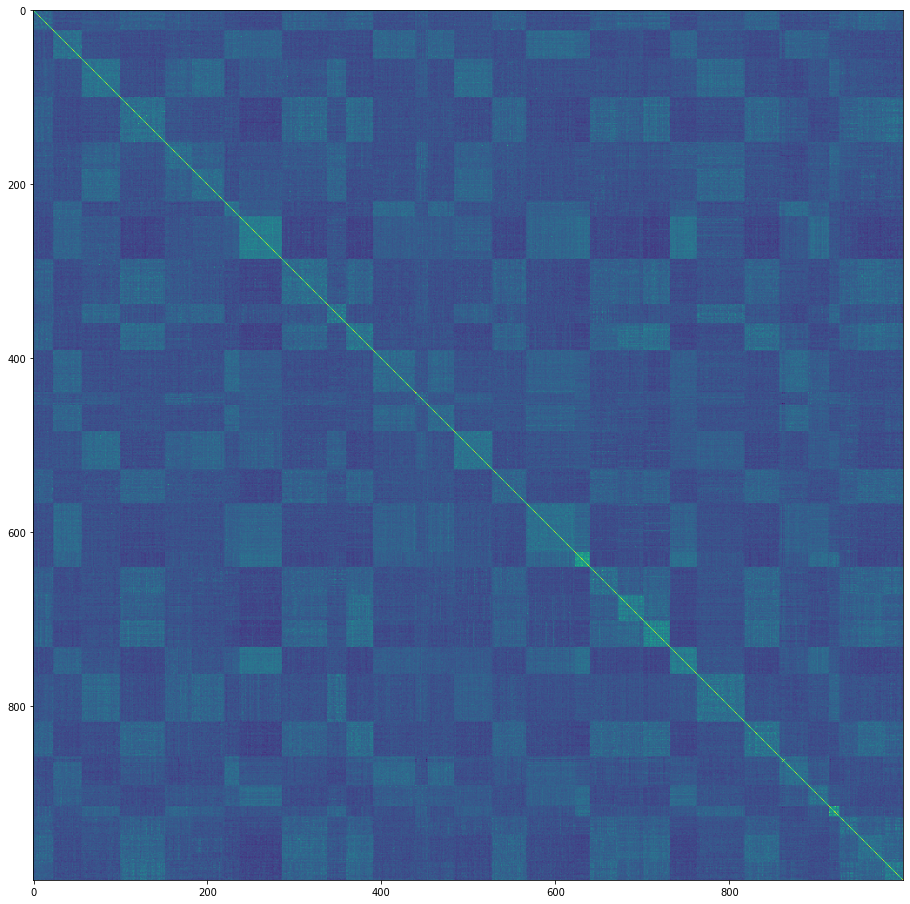

In [54]:
import matplotlib.pyplot as plt
import random
random.seed(12345)
plt.rcParams['figure.figsize'] = [16, 16]

keep = 1000
selection = torch.tensor(random.sample(range(d_V),k=keep))

#uu = torch.matmul(unembed, unembed.T)
uu = torch.matmul(unembed_norm[:,selection].T, unembed_norm[:,selection])

plt.imshow(torch.clamp(uu,-10,10))

from sklearn.cluster import KMeans
clusters = KMeans(30).fit_predict(uu)
values = [(clusters[i].item(), i) for i in range(keep)]
values.sort()

for c,i in values:
    print(c, decode(i))

rearrange = torch.tensor([i for c,i in values])
uu2 = uu[rearrange,:][:,rearrange]
plt.imshow(torch.clamp(uu2, -10, 10))

[(10.489144325256348, 290), (10.462830543518066, 806), (10.389166831970215, 814), (10.105712890625, 798), (9.9061279296875, 897), (9.821596145629883, 426), (9.691343307495117, 365), (9.313688278198242, 83), (9.150894165039062, 550), (9.128732681274414, 262), (9.08669662475586, 596), (8.97148323059082, 672), (8.897652626037598, 344), (8.856989860534668, 786), (8.808984756469727, 300), (8.761627197265625, 844), (8.699478149414062, 836), (8.612424850463867, 122), (8.538633346557617, 267), (8.469482421875, 948), (8.40316104888916, 330), (8.394773483276367, 813), (8.376981735229492, 498), (8.35827922821045, 540), (8.357827186584473, 76), (8.35529613494873, 338), (8.280991554260254, 651), (8.213813781738281, 242), (8.213086128234863, 781), (8.137720108032227, 85)]
torch.Size([30, 30])
+++Dimension 290+++
[(0.46671533584594727, "'"), (0.43321114778518677, 'ess'), (0.42200925946235657, 'ec'), (0.42163658142089844, '�'), (0.3938441872596741, '�')]
+++Dimension 806+++
[(0.4902004897594452, '�'),

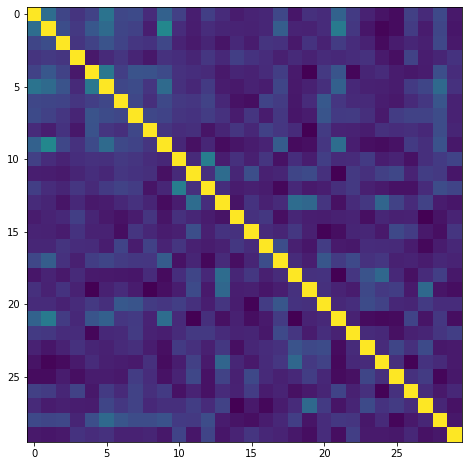

In [57]:
n_big = 30

sums = uu.sum(dim=0)
values = [(v.item(), i) for i,v in enumerate(sums)]
values.sort(reverse=True)
print(values[:n_big])

i_minis = torch.tensor([i for v,i in values[:n_big]])

uu_mini = uu[i_minis, :][:, i_minis]
print(uu_mini.shape)

plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(torch.clamp(uu_mini,0,1000))

for i in range(n_big):
    d = i_minis[i]
    print(f'+++Dimension {d}+++')
    v = unembed[:,d]
    values = [(v.item(), decode(i)) for i,v in enumerate(v)]
    values.sort(reverse=True)
    print(values[:5])